<a href="https://colab.research.google.com/github/InesZenkri/Calculator/blob/main/of_inital_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv("initial_data.csv")
print("Data Information:")
print(data.info())
print("\nData Statistics:")
print(data.describe())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Engine speed        100 non-null    float64
 1   Engine load         100 non-null    float64
 2   Railpressure        100 non-null    float64
 3   Air supply          100 non-null    float64
 4   Crank angle         100 non-null    float64
 5   Intake pressure     100 non-null    float64
 6   Back pressure       100 non-null    float64
 7   Intake temperature  100 non-null    float64
 8   NOx                 100 non-null    float64
 9   PM 1                100 non-null    float64
 10  CO2                 100 non-null    float64
 11  PM 2                100 non-null    float64
 12  Pressure cylinder   100 non-null    float64
dtypes: float64(13)
memory usage: 10.3 KB
None

Data Statistics:
       Engine speed  Engine load  Railpressure   Air supply  Crank angle  \
co

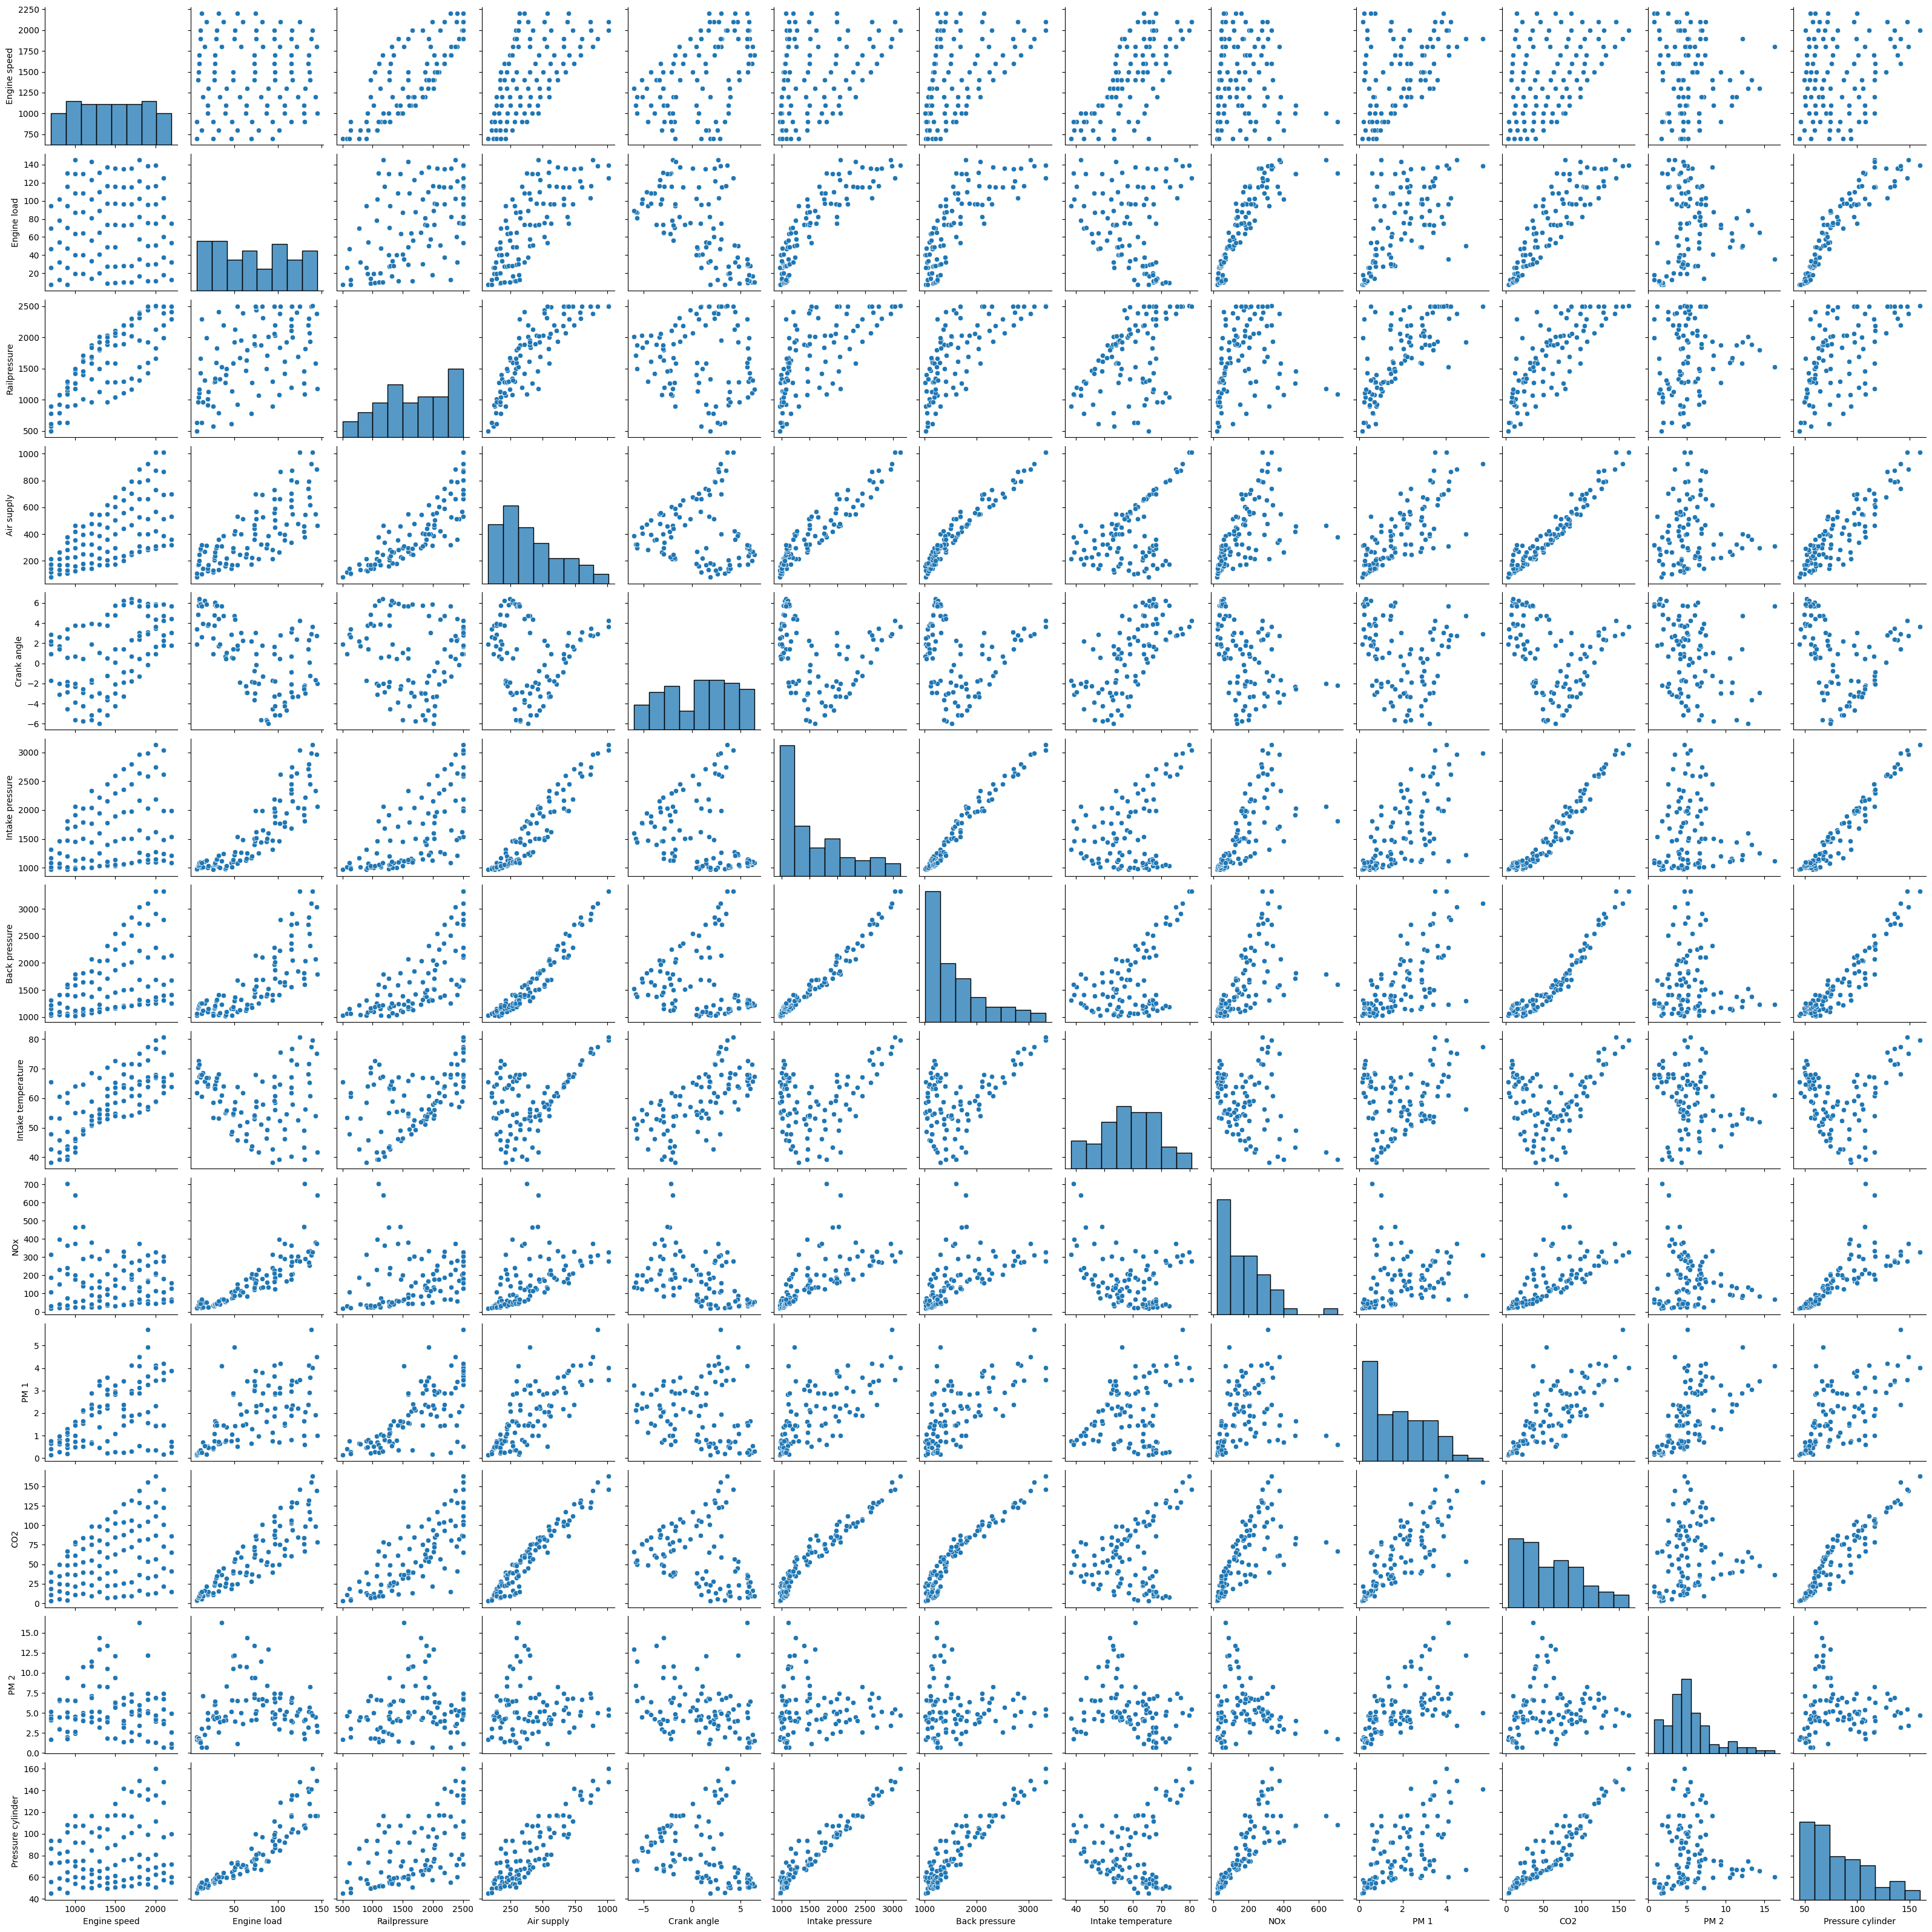

In [ ]:
sns.pairplot(data)
plt.show()

In [ ]:
X = data.iloc[:, :-5]
y = data.iloc[:, -5:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
    print("Mean Squared Error for each output:")
    for i, mse_val in enumerate(mse):
        print(f"Output {i+1}: {mse_val}")

print("Linear Regression:")
evaluate_model(lr_model, X_test, y_test)

print("\nRandom Forest Regression:")
evaluate_model(rf_model, X_test, y_test)

Linear Regression:
Mean Squared Error for each output:
Output 1: 1270.1383685288552
Output 2: 0.7712169937354607
Output 3: 9.183056791566905
Output 4: 14.434570799245574
Output 5: 4.496534815135741

Random Forest Regression:
Mean Squared Error for each output:
Output 1: 249.5211739578423
Output 2: 0.4679749038782183
Output 3: 14.283889188048985
Output 4: 8.934751211773724
Output 5: 14.338504682492566


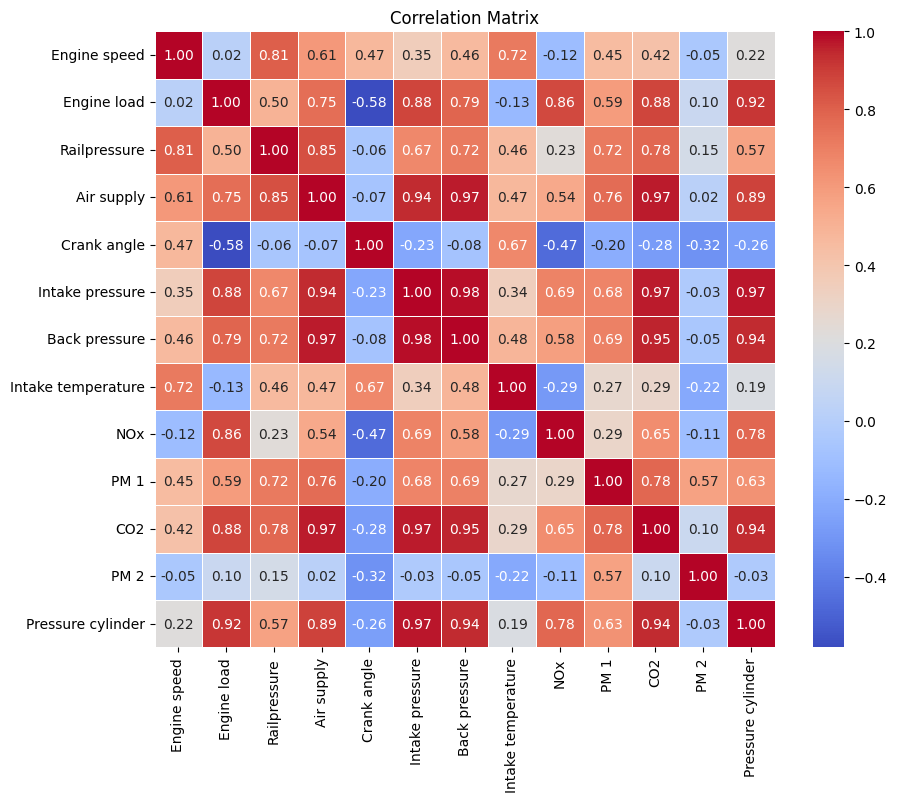

In [ ]:
corr_matrix = data.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()